<h1 style="color:skyblue"><center>TWEET DETECTION  </center></h1>

# Table of context

- 1.<a href="#1">Overview</a>
- 2.<a href="#2">Importing librarires</a>
- 3.<a href="#3">Load Dataset</a>
- 4.<a href="#4">Data Understanding</a>
- 5.<a href="#5">Data Preprocessing</a>
- 6.<a href="#6">Model Building</a>
- 7.<a href="#7">Real Time Prediction</a>

<h1 style="black">Overview</h1>  <a id="1"></a>

## Context

Social media have always been the perfect vehicle to manipulate and alter public opinion through bots, i.e. agents that behave as human users by liking, re-posting and publishing multimedia content which can be real or machine-generated. In the latter case, the spreading of deep-fakes - potentially deceptive images, video, audio or text autonomously generated by a deep neural network - in social media, have been sowing mistrust, hate and deceits at the expense of the people.

As far as it concerns deep-fake texts, the great improvement over their generation has been obtained by the language models (RNN, LSTM, GPT-2, GROVER, CLTR, OPTIMUS, GPT-3): several studies - such as Ippolito et al. (2020) and Adelani et al. (2019) - have shown that humans are capable of detecting those deep-fake texts as machine-generated with a detection rate around the chance value

## Content

To collect machine-generated tweets, the only known way is to heuristically search for Twitter accounts on the web (especially on Github and Twitter, of course) looking for keywords related either to automatic or AI text generation, deep-fake test/tweets,   or to specific technologies such as "GPT-2", "RNN", "LSTM" and so on. After gathering some accounts, two filters were applied: first, only the bot accounts referring to autonomous text generation methods either in the Twitter description, in the profile URLs or the Github description were selected; then, the subset of accounts mimicking (often fine-tuned on) human Twitter profiles were chosen.

<h1 style="black">Importing librarires</h1>  <a id="2"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import joblib
import warnings
warnings.filterwarnings("ignore")

## **Loading Dataset** <a id="3"></a>
- 1.Train Dataset
- 2.Test Dataset
- 3.Validation Dataset

In [2]:
# Train dataset
tweet_train = pd.read_csv('Tweet dataset/train.csv')

#Test dataset
tweet_test = pd.read_csv('Tweet dataset/test.csv')

#Validation dataset
tweet_validation = pd.read_csv('Tweet dataset/validation.csv')

In [3]:
tweet_train

,screen_name,text,account.type,class_type
0,imranyebot,YEA now that note GOOD,bot,others
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn
...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human


## **Data Understanding** <a id="4"></a>

- 1.columns names and count
- 2.shape and dtypes of the dataset
- 3.size of the dataset
- 4.unique & nunique of the dataset
- 5.describe and info

<h4 style="color:skyblue">columns names and count</h4>

In [4]:
#checking columns names
print(tweet_train.keys())

#checking how many columns are there
print(len(tweet_train.keys()))

Index(['screen_name', 'text', 'account.type', 'class_type'], dtype='object')
4


<h4 style="color:skyblue">shape and dtypes of the dataset</h4>

In [5]:
#checking the shape and dtypes of the dataset
def InfoData(dataframe):
    
    print(f"""
== DATA INFO ==
* Shape: {dataframe.shape}
* Number of data = {dataframe.shape[0]}


== COLUMNS INFO ==
* Number of columns: {len(dataframe.columns)}
* Columns with dtype: 
{dataframe.dtypes}""")
    
InfoData(tweet_train)


== DATA INFO ==
* Shape: (20712, 4)
* Number of data = 20712


== COLUMNS INFO ==
* Number of columns: 4
* Columns with dtype: 
screen_name     object
text            object
account.type    object
class_type      object
dtype: object


<h4 style="color:skyblue">size of the dataset</h4>

In [6]:
#checking the size of the dataset
tweet_train.size

82848

<h4 style="color:skyblue">unique & nunique of the dataset</h4>

In [7]:
#checking unique value of the columns
for i in tweet_train.columns:
    print(f"{i}:-")
    print(tweet_train[i].unique())
    print("-"*120)

screen_name:-
['imranyebot' 'zawvrk' 'zawarbot' 'ahadsheriffbot' 'kevinhookebot' 'dril'
 'whalefakes' 'ninjasexparty' 'narendramodi' 'dril_gpt2' 'realDonaldTrump'
 'kevinhooke' 'DeepDrumpf' 'gpt2_trump' 'awhalefact' 'VBoterin'
 'theJadenTrudeau' 'jaden' 'AINarendraModi' 'imranye' 'GenePark'
 'nsp_gpt2' 'GenePark_GPT2' 'ahadsheriff' 'Thorin' 'JustinTrudeau'
 'VitalikButerin' 'calebgamman' 'botustrump' 'calebgamman2' 'deep_thorin'
 'deep_potus' 'DeepElonMusk' 'elonmusk' 'Gpt2Wint' 'utilitylimbgpt2'
 'sarcastic_trump' 'Musk_from_Mars' 'UtilityLimb' 'DrilRnn']
------------------------------------------------------------------------------------------------------------------------
text:-
['YEA now that note GOOD'
 'Listen to This Charming Man by The Smiths  https://t.co/r12OIXkfUO'
 'wish i can i would be seeing other hoes on the worst part' ...
 "@TayandYou doesn't have a clue. You're right. We love our country but we have to do it. I mean, what would you do? @eldiariodedross"
 'Me And My B

In [8]:
#checking the count of unique values in the columns
for i in tweet_train.columns:
    print(f"{i}:-")
    print(tweet_train[i].nunique())
    print('-'*120)

screen_name:-
40
------------------------------------------------------------------------------------------------------------------------
text:-
20712
------------------------------------------------------------------------------------------------------------------------
account.type:-
2
------------------------------------------------------------------------------------------------------------------------
class_type:-
4
------------------------------------------------------------------------------------------------------------------------


<h4 style="color:skyblue">describe</h4>

In [9]:
#describeing the dataset
tweet_train.describe().T

,count,unique,top,freq
screen_name,20712,40,kevinhooke,1951
text,20712,20712,YEA now that note GOOD,1
account.type,20712,2,human,10358
class_type,20712,4,human,10358


<h4 style="color:skyblue">info of dataset</h4>

In [10]:
#checking the info of the dataset
#- Display the total information about dataset
tweet_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20712 entries, 0 to 20711
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   screen_name   20712 non-null  object
 1   text          20712 non-null  object
 2   account.type  20712 non-null  object
 3   class_type    20712 non-null  object
dtypes: object(4)
memory usage: 647.4+ KB


## **Data Preprocessing** <a id="5"></a>

- 1.checking duplicates
- 2.missing values percentage
- 3.droping unwanted columns
- 4.rename column
- 5.visualization the target variable
- 6.removing punctuation and convert into lower case
- 7.Tokennization & Padding
- 8.Word2vec

<h4 style="color:skyblue">checking duplicates</h4>

In [11]:
#checking duplicates
print(tweet_train[tweet_train.duplicated()])
print("The duplicates count in the dataset:-",len(tweet_train[tweet_train.duplicated()]))

Empty DataFrame
Columns: [screen_name, text, account.type, class_type]
Index: []
The duplicates count in the dataset:- 0


In [12]:
tweet_train[tweet_train.duplicated()].sum()

screen_name     0.0
text            0.0
account.type    0.0
class_type      0.0
dtype: float64

<h4 style="color:skyblue">missing values percentage</h4>

In [13]:
#checking the count of the missing values and the percentage of the missing values
count = tweet_train.isnull().sum().sort_values(ascending=False)
percentage = (tweet_train.isnull().sum()/len(tweet_train)*100).sort_values(ascending=False)
missing_values = pd.concat([count,percentage],axis=1,keys=['count','percentage'])
print("The percentage of the missing values is :-")
missing_values

The percentage of the missing values is :-


,count,percentage
screen_name,0,0.0
text,0,0.0
account.type,0,0.0
class_type,0,0.0


<h4 style="color:skyblue">droping unwanted columns</h4>

In [14]:
#Droping the unwanted columns
tweet_train = tweet_train.drop({'screen_name','class_type'},axis=1)

In [15]:
tweet_train

,text,account.type
0,YEA now that note GOOD,bot
1,Listen to This Charming Man by The Smiths htt...,human
2,wish i can i would be seeing other hoes on the...,bot
3,The decade in the significantly easier schedul...,bot
4,"""Theim class=\""alignnone size-full wp-image-60...",bot
...,...,...
20707,Met on the Abversion of our science for the co...,bot
20708,Land for their during the opportunity to the p...,bot
20709,@TayandYou doesn't have a clue. You're right. ...,bot
20710,Me And My Bestie https://t.co/vPq2iDkWZm,human


<h4 style="color:skyblue">Rename columns</h4>

In [16]:
#renameing the column
tweet_train.rename(columns={'account.type':'Category'},inplace=True)
tweet_train

,text,Category
0,YEA now that note GOOD,bot
1,Listen to This Charming Man by The Smiths htt...,human
2,wish i can i would be seeing other hoes on the...,bot
3,The decade in the significantly easier schedul...,bot
4,"""Theim class=\""alignnone size-full wp-image-60...",bot
...,...,...
20707,Met on the Abversion of our science for the co...,bot
20708,Land for their during the opportunity to the p...,bot
20709,@TayandYou doesn't have a clue. You're right. ...,bot
20710,Me And My Bestie https://t.co/vPq2iDkWZm,human


<h4 style="color:skyblue">visualization the target variable</h4>

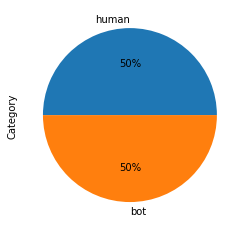

Category percentage present in the data:-
human    50.01
bot      49.99
Name: Category, dtype: float64


In [17]:
#visualization the target variable
tweet_train['Category'].value_counts().plot(kind='pie',autopct="%.0f%%")
plt.show()

print("Category percentage present in the data:-")
print(round(tweet_train.Category.value_counts(normalize=True)*100,2))

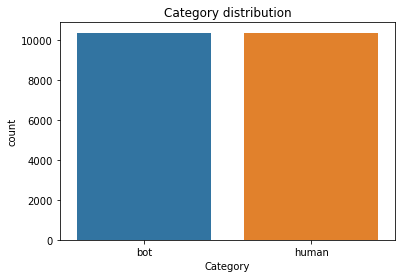

In [18]:
#countplot for category distribution
sns.countplot(x=tweet_train['Category'])
plt.title('Category distribution')
plt.show()

<h4 style="color:skyblue">Removing punctuation</h4>

In [19]:
# Remove punctuation
text_cleaning = "@\S+|http?:\S+|http?:\s|[^A-Za-z0-9]+"

tweet_train['text'] = tweet_train['text'].apply(lambda x : re.sub(text_cleaning,' ',x))
tweet_train['text']

0                                   YEA now that note GOOD
1        Listen to This Charming Man by The Smiths http...
2        wish i can i would be seeing other hoes on the...
3        The decade in the significantly easier schedul...
4         Theim class alignnone size full wp image 6017...
                               ...                        
20707    Met on the Abversion of our science for the co...
20708    Land for their during the opportunity to the p...
20709      doesn t have a clue You re right We love our...
20710               Me And My Bestie https t co vPq2iDkWZm
20711     Thead has a generate existing the Sparching f...
Name: text, Length: 20712, dtype: object

In [20]:
tweet_train

,text,Category
0,YEA now that note GOOD,bot
1,Listen to This Charming Man by The Smiths http...,human
2,wish i can i would be seeing other hoes on the...,bot
3,The decade in the significantly easier schedul...,bot
4,Theim class alignnone size full wp image 6017...,bot
...,...,...
20707,Met on the Abversion of our science for the co...,bot
20708,Land for their during the opportunity to the p...,bot
20709,doesn t have a clue You re right We love our...,bot
20710,Me And My Bestie https t co vPq2iDkWZm,human


<h4 style="color:skyblue">convert into lower case</h4>

In [21]:
#converting into lower case

tweet_train['text'] = tweet_train['text'].apply(lambda x : x.lower())
tweet_train.text

0                                   yea now that note good
1        listen to this charming man by the smiths http...
2        wish i can i would be seeing other hoes on the...
3        the decade in the significantly easier schedul...
4         theim class alignnone size full wp image 6017...
                               ...                        
20707    met on the abversion of our science for the co...
20708    land for their during the opportunity to the p...
20709      doesn t have a clue you re right we love our...
20710               me and my bestie https t co vpq2idkwzm
20711     thead has a generate existing the sparching f...
Name: text, Length: 20712, dtype: object

In [22]:
tweet_train

,text,Category
0,yea now that note good,bot
1,listen to this charming man by the smiths http...,human
2,wish i can i would be seeing other hoes on the...,bot
3,the decade in the significantly easier schedul...,bot
4,theim class alignnone size full wp image 6017...,bot
...,...,...
20707,met on the abversion of our science for the co...,bot
20708,land for their during the opportunity to the p...,bot
20709,doesn t have a clue you re right we love our...,bot
20710,me and my bestie https t co vpq2idkwzm,human


<h4 style="color:skyblue">Tokennization</h4>

In [23]:
#Tokenization & Padding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [24]:
#Tokenization The Data
#convert words to intergers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweet_train['text'])
x = tokenizer.texts_to_sequences(tweet_train['text'])

In [25]:
x[0]

[1259, 75, 15, 1492, 63]

In [26]:
tweet_train['text'][0]

'yea now that note good'

In [27]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'a': 3,
 'of': 4,
 'and': 5,
 'i': 6,
 't': 7,
 'in': 8,
 'u': 9,
 'is': 10,
 'for': 11,
 'https': 12,
 'co': 13,
 'you': 14,
 'that': 15,
 'it': 16,
 'on': 17,
 'my': 18,
 's': 19,
 'this': 20,
 'with': 21,
 'be': 22,
 'have': 23,
 'are': 24,
 'we': 25,
 'people': 26,
 'me': 27,
 'at': 28,
 'all': 29,
 'not': 30,
 'will': 31,
 'your': 32,
 '0001f62d': 33,
 'they': 34,
 'as': 35,
 'can': 36,
 'some': 37,
 'but': 38,
 'an': 39,
 'was': 40,
 'from': 41,
 'so': 42,
 'like': 43,
 'our': 44,
 'just': 45,
 'if': 46,
 'do': 47,
 'get': 48,
 'about': 49,
 'what': 50,
 'more': 51,
 'by': 52,
 'has': 53,
 'new': 54,
 'up': 55,
 're': 56,
 'r': 57,
 'm': 58,
 'n': 59,
 'time': 60,
 'one': 61,
 'who': 62,
 'good': 63,
 'he': 64,
 'out': 65,
 'no': 66,
 'java': 67,
 'when': 68,
 'amp': 69,
 'there': 70,
 'been': 71,
 'their': 72,
 'would': 73,
 'how': 74,
 'now': 75,
 'or': 76,
 'don': 77,
 'see': 78,
 'make': 79,
 'great': 80,
 'here': 81,
 'his': 82,
 'look': 83,
 'still': 8

<h4 style="color:skyblue">Padding</h4>

In [28]:
#Padding The Data
#Length of text to cosider
maxlentext = 30
# add padding
x = pad_sequences(x, maxlen=maxlentext)
x.shape

(20712, 30)

In [29]:
x[2071]

array([    0,     0,     0,     0,   314,     6,  1025,    45,  2212,
        2599,   954,     4,   132,     4,  6376,   981,     2,   597,
           3,   338,     8,   519,    15, 15220,   314,   981,     9,
          33,     9,    33])

In [30]:
%time
vocab_size = len(tokenizer.word_index)+1
print("Total words:-", vocab_size)

CPU times: total: 0 ns
Wall time: 0 ns
Total words:- 34214


<h4 style="color:skyblue">Word2vec</h4>

In [31]:
# Word2Vec

import gensim

In [32]:
# word2vec params

w2v_size = 300
w2v_window = 3
w2v_epoch = 30
w2v_min_count = 1

In [33]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size = w2v_size,
                                            window = w2v_window,
                                            min_count=w2v_min_count,workers=8)

In [34]:
%%time
documents_with_words = [_text.split() for _text in tweet_train.text]

CPU times: total: 0 ns
Wall time: 43.1 ms


In [35]:
documents_with_words[0]

['yea', 'now', 'that', 'note', 'good']

In [36]:
len(documents_with_words)

20712

In [37]:
w2v_model.build_vocab(documents_with_words)

In [38]:
wv_words = w2v_model.wv.key_to_index.keys()
wv_vocab_size = len(wv_words)
print("w2vec Vocab size: ", wv_vocab_size)

w2vec Vocab size:  34213


In [39]:
w2v_model.wv.get_vector('science')

array([-1.75480917e-03, -2.95240409e-03, -1.50567375e-03, -1.82307640e-03,
        1.91171246e-03,  1.08283525e-03, -1.79219642e-03,  3.44089669e-04,
       -2.66241957e-03, -1.34133897e-03, -1.07516849e-03, -1.53986854e-03,
        1.76592194e-03, -1.60782493e-03, -1.52387144e-03,  1.49083135e-05,
       -2.65374174e-03, -2.57240306e-03,  1.40706697e-05,  5.19593559e-05,
        2.87411222e-03, -2.05074227e-03, -1.29628740e-03,  2.34196731e-03,
        2.82019307e-03, -2.99234223e-03,  6.74698327e-04,  2.62449589e-03,
       -2.88131624e-03, -2.61507579e-03,  3.30390688e-03, -2.38832622e-03,
       -9.19175160e-04,  2.51057302e-03,  1.62949646e-03,  1.66992343e-03,
        7.57571077e-04, -2.64230563e-04,  1.59741880e-03,  1.62166439e-03,
        5.43880451e-04,  1.91275356e-03, -2.58640293e-03, -1.89741459e-05,
       -1.03905993e-04, -6.64179330e-04,  1.34326774e-03,  2.83757364e-03,
       -3.12843081e-03,  3.36434838e-04, -2.69784126e-04, -1.02459197e-03,
       -2.77769333e-03,  

In [40]:
len(w2v_model.wv.get_vector('science'))

300

## **Model Building**<a id="6"></a>

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, MaxPool1D, Flatten, Conv1D, LSTM, Activation, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras.layers import Embedding

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [42]:
x.shape

(20712, 30)

In [43]:
y = tweet_train['Category']
y

0          bot
1        human
2          bot
3          bot
4          bot
         ...  
20707      bot
20708      bot
20709      bot
20710    human
20711      bot
Name: Category, Length: 20712, dtype: object

In [44]:
y = np.where(y == 'bot',0,1)
y

array([0, 1, 0, ..., 0, 1, 0])

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [46]:
y_train.shape,y_test.shape

((14498,), (6214,))

In [47]:
# Embedding Layer Design
embedding_matrix = np.zeros((vocab_size, w2v_size))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(34214, 300)


In [48]:
embedding_matrix[1]

array([-1.78742412e-04,  7.88100588e-05,  1.70111656e-03,  3.00309109e-03,
       -3.10098333e-03, -2.37226952e-03,  2.15295702e-03,  2.99099600e-03,
       -1.67180935e-03, -1.25445763e-03,  2.46016821e-03, -5.11157501e-04,
       -1.51220476e-03,  2.18468346e-03, -1.62005343e-03, -6.05339184e-04,
        9.58859921e-04,  3.30624578e-04, -2.76173837e-03, -3.14960629e-03,
        2.43725535e-03,  1.69008737e-03,  2.25256453e-03,  2.54288519e-04,
        2.11696303e-03, -1.13512203e-03, -3.15467507e-04,  1.92285771e-03,
       -2.50721304e-03, -1.31203490e-03, -2.50386074e-03, -3.10014089e-04,
        3.17937299e-03, -2.43972219e-03, -7.77923269e-04, -6.45914057e-04,
        2.69247848e-03, -1.97696523e-03,  1.50537489e-05, -1.58457831e-03,
       -3.20118340e-03,  1.66909769e-03, -2.91986228e-03, -1.46394176e-03,
       -1.16999945e-05, -9.87275416e-05, -2.55374680e-03,  3.20491404e-03,
        1.66068552e-03,  3.07771447e-03, -2.71930615e-03,  1.49859907e-03,
       -1.37902575e-03,  

In [49]:
from keras.layers import Embedding
embedding_layer = Embedding(vocab_size, w2v_size, weights=[embedding_matrix],input_length= maxlentext, trainable=False)

### **Model** 

In [50]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           10264200  
                                                                 
 dropout (Dropout)           (None, 30, 300)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,424,701
Trainable params: 160,501
Non-trainable params: 10,264,200
_________________________________________________________________


In [51]:
model.compile(loss=['binary_crossentropy'], optimizer="adam", metrics=['accuracy'])

In [54]:
# Training Data
history = model.fit(x_train,y_train, batch_size=20, epochs=10)

Epoch 1/10
725/725 [==============================] - 30s 42ms/step - loss: 0.5027 - accuracy: 0.7092
Epoch 2/10
725/725 [==============================] - 30s 41ms/step - loss: 0.4980 - accuracy: 0.7073
Epoch 3/10
725/725 [==============================] - 30s 42ms/step - loss: 0.5007 - accuracy: 0.7063
Epoch 4/10
725/725 [==============================] - 30s 41ms/step - loss: 0.4948 - accuracy: 0.7127
Epoch 5/10
725/725 [==============================] - 30s 42ms/step - loss: 0.4934 - accuracy: 0.7164
Epoch 6/10
725/725 [==============================] - 30s 42ms/step - loss: 0.4891 - accuracy: 0.7195
Epoch 7/10
725/725 [==============================] - 30s 42ms/step - loss: 0.4911 - accuracy: 0.7163
Epoch 8/10
725/725 [==============================] - 30s 41ms/step - loss: 0.4886 - accuracy: 0.7220
Epoch 9/10
725/725 [==============================] - 30s 42ms/step - loss: 0.4883 - accuracy: 0.7180
Epoch 10/10
725/725 [==============================] - 30s 42ms/step - loss: 0.486

In [55]:
#checking the shape of x_train & y_train
x_train.shape,y_train.shape

((14498, 30), (14498,))

In [56]:
%time
score = model.evaluate(x_test, y_test, batch_size=20)
print("Accuracy:",score[1])
print("Loss:",score[0])

CPU times: total: 0 ns
Wall time: 0 ns
311/311 [==============================] - 4s 12ms/step - loss: 0.4822 - accuracy: 0.7182
Accuracy: 0.7182169556617737
Loss: 0.4822444021701813


In [57]:
y_pred = model.predict(x_test, verbose=1, batch_size=5)

1243/1243 [==============================] - 9s 7ms/step


In [58]:
y_pred

array([[0.9965333 ],
       [0.2638334 ],
       [0.33837336],
       ...,
       [0.41193572],
       [0.38169953],
       [0.38098216]], dtype=float32)

In [59]:
y_pred=np.where(y_pred>0.5,1,0)

In [60]:
#checking shape of y_test & y_pred
y_test.shape, y_pred.shape

((6214,), (6214, 1))

In [61]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [62]:
y_pred[45]

array([1])

In [63]:
y_test.shape

(6214,)

In [64]:
x_test.shape

(6214, 30)

In [65]:
#checking confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2750,  374],
       [1377, 1713]], dtype=int64)

In [66]:
#checking classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76      3124
           1       0.82      0.55      0.66      3090

    accuracy                           0.72      6214
   macro avg       0.74      0.72      0.71      6214
weighted avg       0.74      0.72      0.71      6214



In [67]:
#checking accuracy score
accuracy_score(y_test, y_pred, normalize=True)

0.7182169295140006

### Save Model

In [68]:
joblib.dump(tokenizer,'token.pkl')

['token.pkl']

In [69]:
model.save("tweet_dection.h5")

<h1 style="color:black">Real Time Prediction</h1> <a id="7"><a/>

In [70]:
import joblib

tokenizer = joblib.load("token.pkl")

In [71]:
from keras.models import load_model

model = load_model("tweet_dection.h5")

In [72]:
labels = {0:'bot', 1:'human'}

In [73]:
def predict(text):
    import time
    start_at = time.time()
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]),maxlen=30)
    score = model.predict([x_test])
    print(score[0][0])
    if score[0][0]>0.5:
        c1 = 1
    else:
        c1 = 0
    label = labels[c1]
    return {"Prediction":c1, "label":label, "elapsed_time":time.time()-start_at}

In [74]:
predict('yea now that note good')

1/1 [==============================] - 0s 252ms/step
0.5002299


{'Prediction': 1, 'label': 'human', 'elapsed_time': 0.2911679744720459}

In [75]:
tweet_train.text[1]

'listen to this charming man by the smiths https t co r12oixkfuo'

In [76]:
predict(tweet_train.text[45])

1/1 [==============================] - 0s 22ms/step
0.4028711


{'Prediction': 0, 'label': 'bot', 'elapsed_time': 0.05413413047790527}

In [77]:
tweet_train.Category[10]

'bot'

In [78]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [79]:
#For checking the actual & Predicted value
for i in range(30,40):
    print(tweet_train.text[i])
    print("Actual:", tweet_train.Category[i])
    print()
    print("Predicted:",predict(tweet_train.text[i])['label'])
    print()

man y all really taking fatwas from tik tok imams https t co 8baxp6oofs
Actual: human

1/1 [==============================] - 0s 25ms/step
0.9982618
Predicted: human

we accept the their result of the people of planet the people of the world i thank the people 
Actual: bot

1/1 [==============================] - 0s 15ms/step
0.016272804
Predicted: bot

 the content heire and to articles and are of the featurning i thiber which the rewes beans are some the a vm and a defaults package s to part the first of the docs from a second and the technologies on 
Actual: bot

1/1 [==============================] - 0s 16ms/step
0.0023442127
Predicted: bot

lets get your fat cock
Actual: bot

1/1 [==============================] - 0s 19ms/step
0.44328472
Predicted: bot

happy to his for the people of the state work tom tolests from the people 
Actual: bot

1/1 [==============================] - 0s 21ms/step
0.100810505
Predicted: bot

just like schiff fabricated my phone call he will fabricate the 